In [ ]:
import pandas as pd
import numpy as np
from scipy.spatial import distance_matrix
import matplotlib.pyplot as plt

# Try reading the file with a different encoding, such as 'latin1'
try:
    data = pd.read_csv('/Users/jmframe/wgi_feb2012.csv', encoding='latin1')
except UnicodeDecodeError as e:
    print("Error reading the file with latin1 encoding:", e)

# Check the data to ensure it's read correctly
print(data.head())

In [ ]:
data.columns

In [ ]:
# Load the data
data = pd.read_csv('/Users/jmframe/wgi_feb2012.csv', encoding='latin1')

# Check for missing values and handle them
print("Before dropping NaNs", data.shape)
data = data.dropna(subset=['lat', 'lon', 'mean_depth'])
print("After dropping NaNs", data.shape)

# Extract relevant columns
latitudes = data['lat']
longitudes = data['lon']
values = data['mean_depth']

In [ ]:
data.shape

In [ ]:
print(data.head())

In [ ]:
print(data.tail())

Training MSE: 4.974
Test MSE: 2165.979
Training R^2: 0.993
Test R^2: 0.065


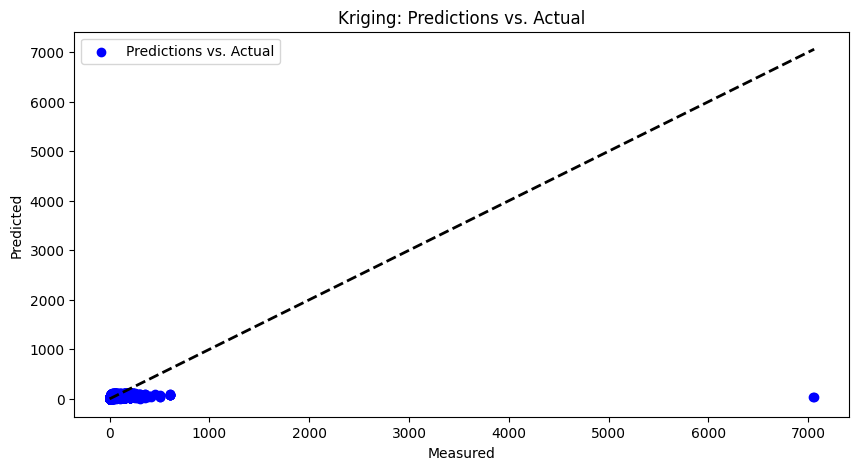

In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from pykrige.ok import OrdinaryKriging
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# Load your dataset
data_path = '/Users/jmframe/wgi_feb2012.csv'
df = pd.read_csv(data_path, encoding='latin1')

# Filtering out the necessary columns and dropping NaNs in 'mean_depth', 'lat', 'lon'
df_filtered = df[['lat', 'lon', 'mean_depth']].dropna(subset=['mean_depth', 'lat', 'lon'])

# Prepare the data
X = df_filtered[['lat', 'lon']]
y = df_filtered['mean_depth']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=42)

# Convert to numpy arrays for use with PyKrige
train_coords = X_train.to_numpy()
train_values = y_train.to_numpy()
test_coords = X_test.to_numpy()
test_values = y_test.to_numpy()

# Create and fit the kriging model
OK = OrdinaryKriging(
    train_coords[:, 0], train_coords[:, 1], train_values,
    variogram_model='spherical',  # You can choose or test other models such as 'linear', 'exponential'
    verbose=False, enable_plotting=False
)

# Make predictions
y_train_pred, train_ss = OK.execute('points', train_coords[:, 0], train_coords[:, 1])
y_test_pred, test_ss = OK.execute('points', test_coords[:, 0], test_coords[:, 1])

# Calculate the performance metrics
mse_train = mean_squared_error(train_values, y_train_pred)
mse_test = mean_squared_error(test_values, y_test_pred)
r2_train = r2_score(train_values, y_train_pred)
r2_test = r2_score(test_values, y_test_pred)

print(f'Training MSE: {mse_train:.3f}')
print(f'Test MSE: {mse_test:.3f}')
print(f'Training R^2: {r2_train:.3f}')
print(f'Test R^2: {r2_test:.3f}')

# Plot predictions against actual values
plt.figure(figsize=(10, 5))
plt.scatter(test_values, y_test_pred, color='blue', label='Predictions vs. Actual')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Kriging: Predictions vs. Actual')
plt.legend()
plt.show()

In [7]:
# Make predictions on the test set
z_test_pred, ss = OK.execute('points', X_test['lon'].values, X_test['lat'].values)


In [9]:
z_test_pred

masked_array(data=[108.91581405065267, 81.50113555657907,
                   118.10564882602085, ..., 36.19811434316026,
                   104.25387720176927, 81.11010189978361],
             mask=[False, False, False, ..., False, False, False],
       fill_value=1e+20)

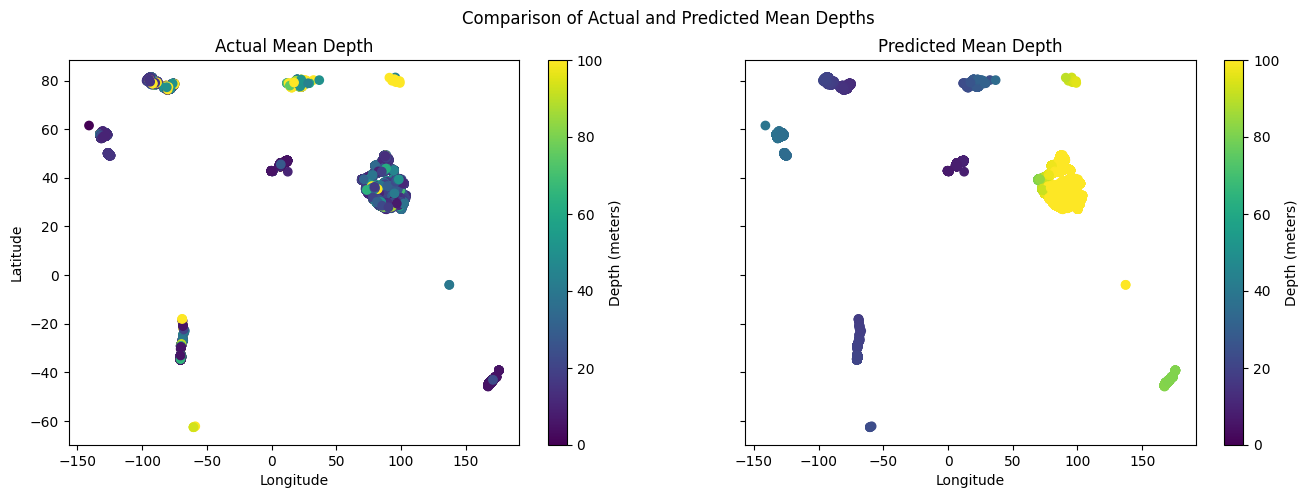

In [10]:


# Determine the color scale limits based on actual data
vmin = y.min()
vmax = y.max()

# Create a plot
fig, ax = plt.subplots(1, 2, figsize=(16, 5), sharey=True)

# Scatter plot for actual mean depth
sc1 = ax[0].scatter(X_test['lon'], X_test['lat'], c=y_test, cmap='viridis', vmin=0, vmax=100, label='Actual Mean Depth')
ax[0].set_title('Actual Mean Depth')
ax[0].set_xlabel('Longitude')
ax[0].set_ylabel('Latitude')
fig.colorbar(sc1, ax=ax[0], label='Depth (meters)')

# Scatter plot for predicted mean depth
sc2 = ax[1].scatter(X_test['lon'], X_test['lat'], c=z_test_pred, cmap='viridis', vmin=0, vmax=100, label='Predicted Mean Depth')
ax[1].set_title('Predicted Mean Depth')
ax[1].set_xlabel('Longitude')
fig.colorbar(sc2, ax=ax[1], label='Depth (meters)')

plt.suptitle('Comparison of Actual and Predicted Mean Depths')
plt.show()

Epoch 1/2


/Users/jmframe/miniconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2168/2168 ━━━━━━━━━━━━━━━━━━━━ 1s 292us/step - loss: 1288.1913
Epoch 2/2
2168/2168 ━━━━━━━━━━━━━━━━━━━━ 1s 287us/step - loss: 2901.7322
2168/2168 ━━━━━━━━━━━━━━━━━━━━ 0s 163us/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 467us/step
Training MSE: 2141.010
Test MSE: 544.265
Training R^2: 0.016
Test R^2: 0.067


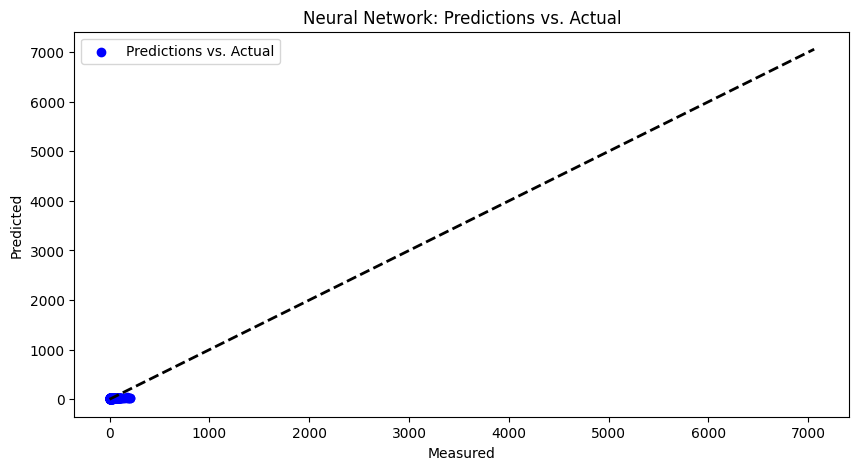

In [14]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load your dataset
data_path = '/Users/jmframe/wgi_feb2012.csv'
df = pd.read_csv(data_path, encoding='latin1')

# Filtering out the necessary columns and dropping NaNs in 'mean_depth', 'lat', 'lon'
df_filtered = df[['lat', 'lon', 'mean_depth']].dropna(subset=['mean_depth', 'lat', 'lon'])

# Prepare the data
X = df_filtered[['lat', 'lon']]
y = df_filtered['mean_depth'].values

# Normalize the features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.01, random_state=42)

# Create a Neural Network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=2, batch_size=32, verbose=1)

# Make predictions
y_train_pred = model.predict(X_train).flatten()
y_test_pred = model.predict(X_test).flatten()

# Calculate the performance metrics
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f'Training MSE: {mse_train:.3f}')
print(f'Test MSE: {mse_test:.3f}')
print(f'Training R^2: {r2_train:.3f}')
print(f'Test R^2: {r2_test:.3f}')

# Plot predictions against actual values
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_test_pred, color='blue', label='Predictions vs. Actual')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Neural Network: Predictions vs. Actual')
plt.legend()
plt.show()